 Use VS code to author Python scripts and easily convert them to Jupyter notebooks.

 Afterward, conver the Jupyter notebook (.ipynb) to HTML so it is viewable in Shiny Server.

 `jupyter nbconvert *.ipynb --to html -y --template full`

 See more: https://code.visualstudio.com/docs/python/jupyter-support

 Below is a quick demo of the Python library, [ezpq](https://github.com/dm3ll3n/ezpq).

In [4]:

import ezpq
import time
import pandas as pd


In [5]:
all_output = list()

# run three different `ezpq` parallel queues, sequentially.
for qid in [1, 2, 3]:
    # each queue will process 5 jobs at a time.
    with ezpq.Queue(5, qid='queue_' + str(qid)) as Q:
        # submit 20 jobs, each taking exactly one second.
        for i in range(20):
            lane = i % 5 # lanes handle dependent jobs.
            Q.put(time.sleep, args=1,
                  lane=lane, name='Job '+str(i))

        # wait for all enqueued jobs to complete.
        Q.wait()
        
        # collect job results
        all_output.extend( Q.collect() )

print('{} job results.'.format(len(all_output)))

# Peek at results in a dataframe.
pd.DataFrame( all_output )[['qid', 'id', 'lane', 'runtime']].head()


60 job results.


,qid,id,lane,runtime
0,queue_1,1,0,1.010010
1,queue_1,2,1,1.022951
2,queue_1,3,2,1.036379
3,queue_1,4,3,1.030257
4,queue_1,5,4,1.017502


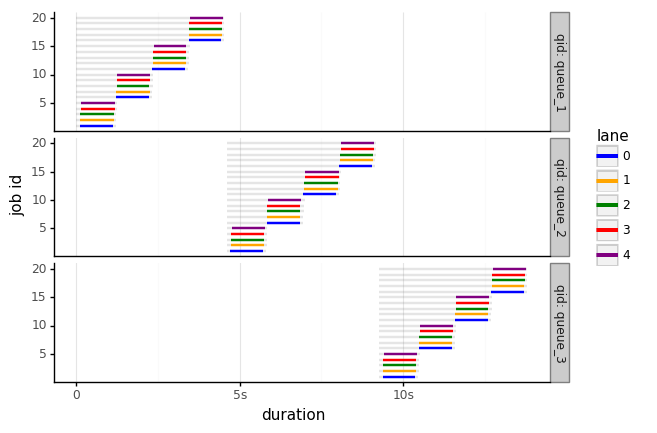

<ggplot: (-9223363275765102830)>

In [6]:

# Plot queue operations.
ezpq.Plot(all_output).build(facet_by='qid',
                            color_by='lane',
                            color_pal=['blue', 'orange', 'green',
                                       'red', 'purple'])
